# Finally able to do some modelling

In [174]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from collections import Counter
from sklearn.cross_validation import train_test_split
import diagnostic_plots
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler



import numpy as np
import pandas as pd
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

%matplotlib inline

## Loading all the data to make Diagnoistic Plot


In [205]:
outer_merged_df = pd.read_pickle('outer_merged_df.pkl')
outer_merged_df.rename(columns = {'Artist': 'artist', 'Song': 'song'}, inplace = True)
get_num_weeks_df = outer_merged_df[['artist', 'song', 'num_weeks']]

#print(get_num_weeks_df.sort_values('num_weeks', ascending = False))
#get_num_weeks_df.set_index(['artist', 'song'])
#get_num_weeks


#need to make sure spotify actually took all the songs that i was interested in and could find
completed_wo_num_weeks = pd.read_pickle('completed_spotify_files.pkl')
#print(completed_wo_num_weeks[completed_wo_num_weeks['song'] == 'Radioactive'])
completed_wo_num_weeks.drop_duplicates(['artist', 'song'], inplace = True)
# print(completed_wo_num_weeks)
joined = pd.merge(completed_wo_num_weeks, get_num_weeks_df, how = 'left')
#print(joined.sort_values('num_weeks', ascending = False))
joined.num_weeks.fillna(0, inplace = True)
joined.drop_duplicates(['artist', 'song'], inplace = True)
#len(joined)
#joined.num_weeks.sort_values(ascending=False)
#Counter(joined.song)
#joined
joined

acousticness                                       analysis_url  \
0          0.399000  https://api.spotify.com/v1/audio-analysis/0LJB...   
1          0.038200  https://api.spotify.com/v1/audio-analysis/717m...   
2          0.005920  https://api.spotify.com/v1/audio-analysis/5UUE...   
3          0.887000  https://api.spotify.com/v1/audio-analysis/6zsZ...   
4          0.840000  https://api.spotify.com/v1/audio-analysis/0n5k...   
5          0.151000  https://api.spotify.com/v1/audio-analysis/5XRm...   
6          0.580000  https://api.spotify.com/v1/audio-analysis/3dOf...   
7          0.694000  https://api.spotify.com/v1/audio-analysis/4u3h...   
8          0.088500  https://api.spotify.com/v1/audio-analysis/5UDo...   
9          0.291000  https://api.spotify.com/v1/audio-analysis/5SFe...   
10         0.020000  https://api.spotify.com/v1/audio-analysis/73CH...   
12         0.485000  https://api.spotify.com/v1/audio-analysis/3qXS...   
13         0.948000  https://api.spotify.com/v1/audio-analysis/1zXE...   
14         0.635000  https://api.spotify.com/v1/audio-analysis/36Ql...   
15         0.443000  https://api.spotify.com/v1/audio-analysis/7tjt...   
16         0.300000  https://api.spotify.com/v1/audio-analysis/4FmM...   
17         0.930000  https://api.spotify.com/v1/audio-analysis/48A1...   
18         0.285000  https://api.spotify.com/v1/audio-analysis/56Z4...   
19         0.191000  https://api.spotify.com/v1/audio-analysis/0soc...   
20         0.008150  https://api.spotify.com/v1/audio-analysis/7h57...   
21         0.061100  https://api.spotify.com/v1/audio-analysis/6W7l...   
22         0.130000  https://api.spotify.com/v1/audio-analysis/0IHa...   
23         0.666000  https://api.spotify.com/v1/audio-analysis/5PIk...   
24         0.000131  https://api.spotify.com/v1/audio-analysis/0tbr...   
25         0.012000  https://api.spotify.com/v1/audio-analysis/7w7N...   
26         0.946000  https://api.spotify.com/v1/audio-analysis/1aYK...   
27         0.610000  https://api.spotify.com/v1/audio-analysis/0YYd...   
28         0.986000  https://api.spotify.com/v1/audio-analysis/65sv...   
29         0.001160  https://api.spotify.com/v1/audio-analysis/0cUK...   
30         0.160000  https://api.spotify.com/v1/audio-analysis/6Vkz...   
...             ...                                                ...   
17947      0.970000  https://api.spotify.com/v1/audio-analysis/3ykF...   
17948      0.124000  https://api.spotify.com/v1/audio-analysis/0amz...   
17949      0.879000  https://api.spotify.com/v1/audio-analysis/0XPv...   
17950      0.992000  https://api.spotify.com/v1/audio-analysis/2FTc...   
17951      0.747000  https://api.spotify.com/v1/audio-analysis/6Dk3...   
17952      0.062900  https://api.spotify.com/v1/audio-analysis/0OZX...   
17953      0.735000  https://api.spotify.com/v1/audio-analysis/7maM...   
17954      0.057100  https://api.spotify.com/v1/audio-analysis/5BPK...   
17955      0.145000  https://api.spotify.com/v1/audio-analysis/4kIE...   
17956      0.026000  https://api.spotify.com/v1/audio-analysis/0Whw...   
17957      0.188000  https://api.spotify.com/v1/audio-analysis/24Id...   
17958      0.054900  https://api.spotify.com/v1/audio-analysis/6LBf...   
17959      0.018400  https://api.spotify.com/v1/audio-analysis/0uDb...   
17960      0.252000  https://api.spotify.com/v1/audio-analysis/3BcG...   
17961      0.053300  https://api.spotify.com/v1/audio-analysis/2f44...   
17962      0.154000  https://api.spotify.com/v1/audio-analysis/3u8m...   
17963      0.272000  https://api.spotify.com/v1/audio-analysis/43vH...   
17964      0.068800  https://api.spotify.com/v1/audio-analysis/6IHd...   
17965      0.169000  https://api.spotify.com/v1/audio-analysis/0PXH...   
17966      0.129000  https://api.spotify.com/v1/audio-analysis/5L79...   
17967      0.008670  https://api.spotify.com/v1/audio-analysis/3Q2t...   
17968      0.016700  https://api.spotify.com/v1/audio-analysis/4Ajw...   
17969      

# All the way to the top (EDA)
I want to do exploratory data analysis of just the songs that were able to crack the top 100 at least once

In [206]:
joined['duration'] = joined.duration_ms / 1000
joined.duration_ms = joined.duration
joined.drop('duration', 1, inplace = True)
#joined.rename(columns = {'duration'})
joined[joined.num_weeks > 0].describe()
#Counter(joined.tempo)
#joined.duration


#acoustiness is not normally distrbuted there is a lot more at the bottom that the top
#energy is skewed with left tail
#valence has outliers to the right
#speechiness is skewed with right tail
#instrumentalness isnt that helpful
#liveness is skewed with right tail
#need to do counts for keys and mode
#popularity is shifted to the right
#mean of tempo is 120bpm

acousticness  danceability  duration_ms       energy  instrumentalness  \
count   1526.000000   1526.000000  1526.000000  1526.000000       1526.000000   
mean       0.274836      0.607328   227.949311     0.621428          0.032665   
std        0.273880      0.155742    75.624830     0.199430          0.136114   
min        0.000014      0.148000    71.967000     0.047700          0.000000   
25%        0.037675      0.505000   186.306500     0.473000          0.000000   
50%        0.177000      0.615000   217.920000     0.639000          0.000004   
75%        0.474750      0.721000   256.309750     0.779000          0.000520   
max        0.974000      0.959000  1561.133000     0.997000          0.966000   

               key     liveness     loudness         mode   popularity  \
count  1526.000000  1526.000000  1526.000000  1526.000000  1526.000000   
mean      5.198558     0.178119    -8.562716     0.741153    53.530144   
std       3.561068     0.142426     3.889808     0.438145    20.914786   
min       0.000000     0.023800   -27.119000     0.000000     0.000000   
25%       2.000000     0.087700   -11.123250     0.000000    40.000000   
50%       5.000000     0.122000    -7.824000     1.000000    57.000000   
75%       8.000000     0.225750    -5.553250     1.000000    69.000000   
max      11.000000     0.989000     2.291000     1.000000   100.000000   

       speechiness        tempo  time_signature      valence    num_weeks  
count  1526.000000  1526.000000     1526.000000  1526.000000  1526.000000  
mean      0.074682   120.427870        3.937746     0.587075    12.899738  
std       0.083527    27.721597        0.312668     0.239294     8.541880  
min       0.022800    60.709000        1.000000     0.037800     1.000000  
25%       0.032400    99.938750        4.000000     0.391000     6.000000  
50%       0.041950   119.903500        4.000000     0.610500    12.000000  
75%       0.071950   137.400500        4.000000     0.791750    19.000000  
max       0.733000   207.673000        5.000000     0.990000    60.000000

In [177]:
#joined[joined.num_weeks == 0].describe()

In [178]:
top_songs = joined[joined.num_weeks > 0].drop(['analysis_url', 'artist', 'uri', 'type', 'track_href'], 1).sort_values('num_weeks', ascending = False)
top_songs.head(20)

acousticness  danceability  duration_ms  energy  \
7185         0.5080         0.588      224.867   0.684   
6024         0.2690         0.640      262.533   0.743   
17403        0.0344         0.684      211.800   0.794   
9628         0.2170         0.675      216.667   0.885   
15907        0.4140         0.748      244.960   0.524   
15908        0.1570         0.532      208.373   0.869   
3499         0.0524         0.416      294.533   0.446   
592          0.0476         0.811      188.754   0.879   
6789         0.2540         0.583      219.493   0.584   
7922         0.0908         0.813      236.933   0.882   
2533         0.6940         0.585      240.166   0.303   
15338        0.1070         0.848      248.373   0.953   
4742         0.0322         0.734      216.360   0.635   
13590        0.4630         0.731      165.387   0.469   
14616        0.0435         0.743      224.773   0.807   
2485         0.0340         0.818      225.983   0.803   
8749         0.0141         0.441      270.800   0.563   
1571         0.2180         0.755      246.467   0.765   
13227        0.1160         0.642      212.693   0.754   
2833         0.1140         0.680      330.200   0.394   

                                                   genre  \
7185   [contemporary country, country, country dawn, ...   
6024             [neo mellow, piano rock, pop, pop rock]   
17403  [dance pop, edm, electropop, metropopolis, pop...   
9628   [dance pop, neo mellow, pop, pop quebecois, po...   
15907             [edm, electropop, pop, tropical house]   
15908             [edm, electropop, pop, tropical house]   
3499   [contemporary country, country, country dawn, ...   
592             [dance pop, hip pop, pop, post-teen pop]   
6789   [dance pop, neo mellow, pop, pop rock, post-te...   
7922   [bubblegum dance, eurodance, europop, german t...   
2533   [acoustic pop, neo mellow, pop, pop rock, vira...   
15338                            [hip house, miami bass]   
4742   [australian pop, dance pop, europop, neo mello...   
13590                             [contemporary country]   
14616                                              [pop]   
2485                     [dance pop, pop, post-teen pop]   
8749                 [neo mellow, pop rock, post-grunge]   
1571   [dance pop, europop, hip pop, pop, pop rap, po...   
13227                                      [vocal house]   
2833                                    [new jack swing]   

                           id  instrumentalness  key  liveness  loudness  \
7185   4xInIiKipU1mtUogJ3ZdYr          0.000000    1    0.1410    -5.154   
6024   5fVZC9GiM4e8vu99W0Xf6J          0.000000   10    0.1010    -4.080   
17403  7gUpO6td4OOnu0Lf9vhcIV          0.044500    8    0.1110    -6.080   
9628   0KpfYajJVVGgQ32Dby7e9i          0.000000    1    0.0860    -4.432   
15907  7BKLCZ1jbUBVqRi2FVlTVw          0.000000    8    0.1110    -5.599   
15908  1i1fxkWeaMmKEB4T7zqbzK          0.005080   11    0.1360    -5.094   
3499   65B1tEOv5W294uCKbmEcFV          0.000000    7    0.0891    -9.557   
592    0ifSeVGUr7py5GggttDhXw          0.000002    9    0.1090    -3.724   
6789   3f3omU8n47Mqyab5nCaGyT          0.000000    5    0.1230    -5.362   
7922   3pEuO9J2MTEmec8kUfYYvl          0.004570    7    0.1470    -7.575   
2533   05pKAafT85jeeNhZ6kq7HT          0.000000    4    0.1150   -10.058   
15338  7AYr5rYQFXJzLSJK9vx6om          0.000000    9    0.3420    -5.040   
4742   6QLU1GKy2Zh2mOh2uoJ0TV          0.000000    5    0.0808    -7.030   
13590  7mldq42yDuxiUNn08nvzHO          0.000001    5    0.1030    -7.226   
14616  3tCwjWLicbjsMCvXhN0WOE          0.000000    1    0.3090    -3.780   
2485   6b8Be6ljOzmkOmFslEb23P          0.000000    1    0.1530    -4.282   
8749   2EVNYzHWebyLvKxPX6Ozt8          0.000004    6    0.1010    -7.274   
1571   66ZcOcouenzZEnzTJvoFmH          0.000000    1    0.1620    -3.475   
13227  6atodngcu0uc9uHkP1mdKS          0.037500    1    0.0601    -7.649   
2833   

In [179]:
#mask = joined.num_weeks < 0
not_top_songs = joined[joined.num_weeks == 0].drop(['analysis_url', 'artist', 'uri', 'type', 'track_href'], 1).sort_values('num_weeks', ascending = False)
#grab_random_index = np.random.randint(0, len(not_top_songs), len(top_songs))
#not_top_songs.reset_index(inplace = True)
not_top_songs
sampled_not_top = not_top_songs.sample(len(top_songs))
sampled_not_top



acousticness  danceability  duration_ms  energy  \
13555      0.727000         0.422      180.533   0.491   
4130       0.750000         0.567      162.320   0.672   
11772      0.048500         0.722      227.480   0.630   
16822      0.320000         0.639      230.640   0.745   
11183      0.765000         0.637      233.973   0.542   
8382       0.769000         0.606      158.960   0.296   
2320       0.472000         0.528      340.349   0.415   
6139       0.038300         0.545      269.387   0.701   
5965       0.036900         0.531      207.067   0.933   
8513       0.320000         0.688      206.120   0.500   
4613       0.267000         0.683      210.738   0.383   
13895      0.702000         0.381      352.800   0.382   
17848      0.759000         0.692      131.987   0.366   
16178      0.144000         0.686      170.867   0.895   
6559       0.502000         0.817      248.493   0.628   
17381      0.000033         0.398      296.733   0.877   
5196       0.001100         0.192      140.787   0.955   
4747       0.000003         0.188      313.835   0.926   
16885      0.001020         0.648      251.853   0.918   
13510      0.479000         0.744      249.053   0.376   
9569       0.000017         0.690      202.107   0.729   
7999       0.000670         0.360      245.253   0.838   
11990      0.501000         0.438      244.994   0.709   
14573      0.066300         0.658      266.347   0.710   
9762       0.058600         0.553      227.091   0.846   
5625       0.167000         0.641      396.227   0.700   
6085       0.265000         0.605      217.733   0.804   
14727      0.095400         0.528      248.200   0.750   
15935      0.009990         0.718      301.733   0.691   
3999       0.001920         0.513      269.400   0.820   
...             ...           ...          ...     ...   
4220       0.600000         0.458      358.693   0.408   
7145       0.052200         0.762      223.293   0.644   
10282      0.002170         0.351      194.678   0.942   
7073       0.053000         0.858      214.213   0.731   
11431      0.014400         0.736      194.467   0.843   
5042       0.244000         0.768      240.573   0.517   
2712       0.274000         0.697      236.160   0.880   
12711      0.000849         0.279      381.480   0.490   
8300       0.393000         0.452      108.880   0.819   
10398      0.748000         0.603      177.227   0.581   
14015      0.191000         0.818      209.763   0.830   
16345      0.412000         0.461      261.613   0.430   
10352      0.013300         0.772      193.667   0.845   
8022       0.208000         0.631      291.027   0.620   
16682      0.842000         0.612      242.400   0.199   
8338       0.088400         0.978      353.164   0.532   
831        0.000618         0.753      380.440   0.682   
12326      0.023300         0.894      239.227   0.598   
7708       0.620000         0.536      242.467   0.611   
5926       0.000014         0.804      420.000   0.743   
6152       0.731000         0.588      179.815   0.269   
1151       0.000394         0.558      235.533   0.814   
9125       0.579000         0.544      129.387   0.617   
16819      0.008980         0.775      211.507   0.882   
6674       0.625000         0.639      134.067   0.401   
21         0.061100         0.780      230.720   0.941   
7664       0.001680         0.512      218.667   0.770   
8492       0.948000         0.575      192.086   0.240   
8714       0.015600         0.774      289.881   0.996   
13405      0.034100         0.483      103.640   0.762   

                                                   genre  \
13555  [brill building pop, bubblegum pop, folk rock,...   
4130   [adult standards, brill building pop, british ...   
11772                [dance pop, europop, pop, pop rock]   
16822                                                 []   
11183                                                 []   
8382                                [brill buildin

In [180]:
joined = sampled_not_top.append(top_songs, ignore_index = True)
joined = top_songs

In [181]:
joined.num_weeks.sort_values()

7063      1.0
583       1.0
589       1.0
17830     1.0
17828     1.0
6920      1.0
17824     1.0
6897      1.0
669       1.0
13200     1.0
11748     1.0
897       1.0
12094     1.0
6582      1.0
1035      1.0
11704     1.0
1069      1.0
1087      1.0
1936      1.0
1131      1.0
6488      1.0
11691     1.0
5399      1.0
7932      1.0
9246      1.0
6575      1.0
454       1.0
15058     1.0
336       1.0
5763      1.0
         ... 
9727     35.0
3232     35.0
2574     36.0
8900     36.0
4701     37.0
2134     38.0
14190    38.0
15914    39.0
14230    39.0
1571     40.0
2833     40.0
11159    40.0
13227    40.0
8749     41.0
2485     41.0
14616    41.0
13590    41.0
4742     42.0
15338    42.0
2533     44.0
7922     45.0
6789     46.0
592      47.0
3499     48.0
15908    52.0
15907    52.0
9628     54.0
17403    57.0
6024     58.0
7185     60.0
Name: num_weeks, Length: 1526, dtype: float64

In [182]:
#joined.drop(['analysis_url', 'artist', 'id', 'song', 'track_href', 'type', 'uri'], inplace = True, axis =1)
joined.columns
sns.pairplot(joined)
#i also want to look at the distribution of num of weeks in the charts without the 0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [185]:
Counter(joined.num_weeks)

Counter({1.0: 112,
         2.0: 61,
         3.0: 64,
         4.0: 47,
         5.0: 52,
         6.0: 64,
         7.0: 42,
         8.0: 48,
         9.0: 75,
         10.0: 68,
         11.0: 72,
         12.0: 72,
         13.0: 61,
         14.0: 82,
         15.0: 61,
         16.0: 55,
         17.0: 52,
         18.0: 45,
         19.0: 44,
         20.0: 158,
         21.0: 31,
         22.0: 30,
         23.0: 14,
         24.0: 9,
         25.0: 17,
         26.0: 11,
         27.0: 9,
         28.0: 8,
         29.0: 10,
         30.0: 8,
         31.0: 5,
         32.0: 3,
         33.0: 4,
         34.0: 2,
         35.0: 2,
         36.0: 2,
         37.0: 1,
         38.0: 2,
         39.0: 2,
         40.0: 4,
         41.0: 4,
         42.0: 2,
         44.0: 1,
         45.0: 1,
         46.0: 1,
         47.0: 1,
         48.0: 1,
         52.0: 2,
         54.0: 1,
         57.0: 1,
         58.0: 1,
         60.0: 1})

In [184]:
#y_transformed, _ = boxcox(joined.num_weeks)

In [12]:
#using boxcox to transform y-var
y_transformed, _ = boxcox(joined.num_weeks)

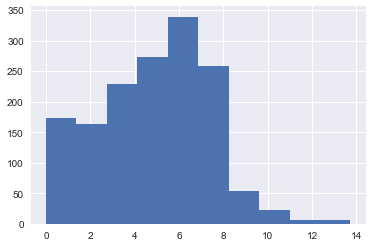

In [13]:
pd.Series(y_transformed).hist()

In [14]:
#joined.drop([''])

## Trying to my best find my base linear regression model

In [207]:
equation = 'num_weeks ~ acousticness  + danceability + duration_ms + energy + instrumentalness + key + liveness + loudness + mode + popularity + speechiness + tempo + time_signature + valence'
#y, X = patsy.dmatrices(equation, data=train_df, return_type="dataframe")

# Create your model
model = smf.ols(equation, data = joined)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_weeks   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     30.26
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           1.38e-80
Time:                        11:13:38   Log-Likelihood:                -51803.
No. Observations:               17970   AIC:                         1.036e+05
Df Residuals:                   17955   BIC:                         1.038e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1001      0.490     -0.204      0.838      -1.061       0.860
acousticness        -0.1887      0.149     -1.269      0.204      -0.480       0.103
danceability         1.2005      0.252      4.764      0.000       0.707       1.694
duration_ms         -0.0005      0.000     -1.184      0.236      -0.001       0.000
energy              -0.3697      0.273     -1.354      0.176      -0.905       0.166
instrumentalness    -0.6623      0.151     -4.385      0.000      -0.958      -0.366
key                  0.0104      0.009      1.130      0.258      -0.008       0.028
liveness            -0.7560      0.188     -4.013      0.000      -1.125      -0.387
loudness             0.0129      0.012      1.070      0.285      -0.011       0.037
mode                 0.1992      0.073      2.712      0.007       0.055       0.343
popularity           0.0216      0.001     15.072      0.000       0.019       0.024
speechiness         -0.9538      0.353     -2.706      0.007      -1.645      -0.263
tempo                0.0016      0.001      1.327      0.185      -0.001       0.004
time_signature       0.0651      0.094      0.691      0.490      -0.120       0.250
valence             -0.4450      0.170     -2.613      0.009      -0.779      -0.111
==============================================================================
Omnibus:                    17226.179   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           689917.336
Skew:                           4.792   Prob(JB):                         0.00
Kurtosis:                      31.802   Cond. No.                     4.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I will be using stats model formula

In [187]:
joined.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'genre', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'song', 'speechiness', 'tempo', 'time_signature', 'valence',
       'num_weeks'],
      dtype='object')

such trash

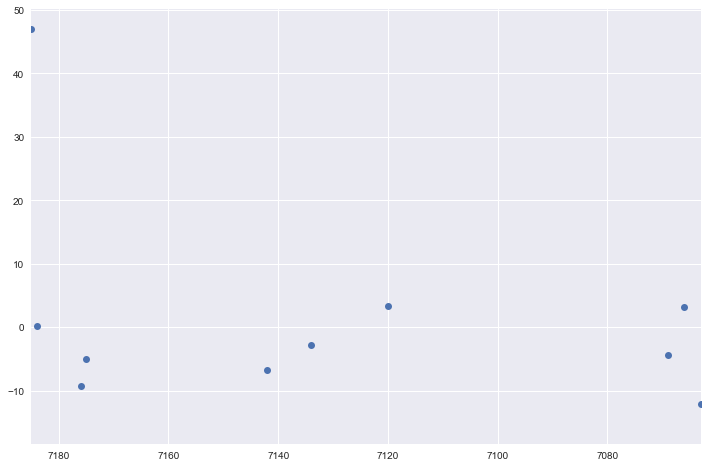

In [188]:
fit.resid.plot(style='o', figsize=(12,8));

This makes sense, because the 'top songs' were appened to the end of the dataframe so it would underfit for those lol

In [189]:
joined.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'genre', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'song', 'speechiness', 'tempo', 'time_signature', 'valence',
       'num_weeks'],
      dtype='object')

In [212]:
type(joined.genre[0])

list

In [218]:
##break down the songs by the genre that they are categorized by

genre_count = {}
for index, row in enumerate(joined.genre):
    for genre in row:
        print(type(genre))
        genre_count[genre] = genre_count.get(genre, 0) + 1
        print(type(genre_count))
    #break


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>


<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>
<class 'str'>
<class 'dict'>

In [219]:
##here are the top 60 genres mentioned in the dataset

pd.Series(genre_count).sort_values(ascending=False)[:60]

rock                    2076
mellow gold             1917
soft rock               1760
dance pop               1598
folk rock               1445
classic rock            1439
pop                     1428
album rock              1375
soul                    1256
pop rap                 1137
quiet storm             1099
motown                  1096
adult standards         1085
brill building pop      1084
funk                    1024
christmas               1008
rap                      994
hip hop                  980
urban contemporary       971
disco                    931
r&b                      884
classic soul             846
bubblegum pop            816
pop rock                 790
new wave pop             789
country                  764
hard rock                755
art rock                 737
southern hip hop         699
folk                     660
contemporary country     659
roots rock               616
rock-and-roll            615
post-teen pop            598
country road  

In [220]:
##need to break down the genre into binary categories to be able to engineer this feature and use in linear reg

def has_genre(s_all, genre_synonms):
    for s in s_all:
        if s in genre_synonms:
            return True
    return False

def has_rock(s_all):
    for s in s_all:
        if 'rock' in s.lower():
            return True
    return False

def has_christmas(s_all):
    for s in s_all:
        if 'christmas' in s.lower():
            return True
    return False
   

## Tease apart the genre and keys of the song

In [221]:
joined['is_rock'] = joined.genre.apply(has_rock)
#joined['is_christmas'] = joined.genre.apply(has_christmas)
#joined['is_pop'] = joined.genre.apply(has_pop)
#joined['is_disco'] = joined.genre.apply(lambda s: has_genre(s, ['disco']))
#joined['is_easylistening'] = joined.genre.apply(has_easylistening)
#joined['is_country'] = joined.genre.apply(has_country)

country_syn = ['country', 'folk', 'contemporary country', 'traditional country']
hiphop_syn = ['rap', 'hip hop', 'r&b', 'rhythm and blues', 'soul', 'funk', 'quiet storm', 'urban contemporary',
             'southern hip hop', 'southern soul', 'trap music']
easy_syn = ['easy listening', 'mellow gold', 'adult standards', 'neo melllow']
pop_syn = ['pop', 'disco', 'mowtown', 'metropolis', 'bubblegum dance', 'eurodance']
edm_syn = ['edm', 'dance pop', 'tropical house', 'vocal house']

joined['is_hiphop'] = joined.genre.apply(lambda s: has_genre(s, hiphop_syn))
joined['is_country'] = joined.genre.apply(lambda s: has_genre(s, country_syn))
joined['is_easy'] = joined.genre.apply(lambda s: has_genre(s, easy_syn))
joined['is_pop'] = joined.genre.apply(lambda s: has_genre(s, pop_syn))
joined['is_edm'] = joined.genre.apply(lambda s: has_genre(s, edm_syn))

joined.drop('genre', axis =1, inplace = True)
joined.columns

Index(['acousticness', 'analysis_url', 'artist', 'danceability', 'duration_ms',
       'energy', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'song', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'type', 'uri', 'valence', 'num_weeks', 'is_rock',
       'is_hiphop', 'is_country', 'is_easy', 'is_pop', 'is_edm'],
      dtype='object')

In [194]:
joined.corr().num_weeks

acousticness       -0.093309
danceability        0.090253
duration_ms         0.039701
energy              0.034148
instrumentalness   -0.051766
key                 0.066319
liveness           -0.054931
loudness            0.041491
mode               -0.007990
popularity          0.082300
speechiness        -0.051718
tempo              -0.001131
time_signature      0.061743
valence            -0.005243
num_weeks           1.000000
is_rock             0.022956
is_hiphop           0.000037
is_country          0.048331
is_easy            -0.035250
is_pop              0.072520
is_edm              0.117936
Name: num_weeks, dtype: float64

In [223]:
equation = 'num_weeks ~ acousticness + danceability + duration_ms + energy + instrumentalness + key + liveness + loudness + mode + popularity + speechiness + tempo + time_signature + valence + is_rock + is_hiphop + is_country + is_easy + is_pop + is_edm'

y, X = patsy.dmatrices(equation, data=joined, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_weeks   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     33.05
Date:                Thu, 19 Jul 2018   Prob (F-statistic):          1.08e-124
Time:                        11:45:40   Log-Likelihood:                -51687.
No. Observations:               17970   AIC:                         1.034e+05
Df Residuals:                   17949   BIC:                         1.036e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1441      0.488     -0.295      0.768      -1.101       0.812
is_rock[T.True]       -0.3286      0.088     -3.752      0.000      -0.500      -0.157
is_hiphop[T.True]      0.2967      0.095      3.109      0.002       0.110       0.484
is_country[T.True]     1.2025      0.119     10.146      0.000       0.970       1.435
is_easy[T.True]        0.1079      0.106      1.020      0.308      -0.100       0.315
is_pop[T.True]         0.5669      0.118      4.814      0.000       0.336       0.798
is_edm[T.True]         0.8606      0.133      6.467      0.000       0.600       1.121
acousticness          -0.2809      0.149     -1.888      0.059      -0.572       0.011
danceability           0.5961      0.257      2.315      0.021       0.091       1.101
duration_ms           -0.0003      0.000     -0.884      0.377      -0.001       0.000
energy                 0.0201      0.274      0.073      0.942      -0.517       0.558
instrumentalness      -0.5946      0.152     -3.913      0.000      -0.892      -0.297
key                    0.0099      0.009      1.082      0.279      -0.008       0.028
liveness              -0.7349      0.187     -3.924      0.000      -1.102      -0.368
loudness              -0.0086      0.012     -0.709      0.478      -0.033       0.015
mode                   0.2291      0.074      3.109      0.002       0.085       0.373
popularity             0.0136      0.002      7.388      0.000       0.010       0.017
speechiness           -0.9694      0.362     -2.680      0.007      -1.678      -0.260
tempo                  0.0015      0.001      1.276      0.202      -0.001       0.004
time_signature         0.0548      0.094      0.584      0.559      -0.129       0.239
valence               -0.2938      0.171     -1.716      0.086      -0.629       0.042
==============================================================================
Omnibus:                    17042.284   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           668316.412
Skew:                           4.715   Prob(JB):                         0.00
Kurtosis:                      31.348   Cond. No.                     4.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [227]:
joined = pd.get_dummies(joined, columns = ['key'], drop_first = False)
joined.drop('key_11', axis =1, inplace = True)

In [228]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17970 entries, 0 to 17976
Data columns (total 38 columns):
acousticness        17970 non-null float64
analysis_url        17970 non-null object
artist              17970 non-null object
danceability        17970 non-null float64
duration_ms         17970 non-null float64
energy              17970 non-null float64
id                  17970 non-null object
instrumentalness    17970 non-null float64
liveness            17970 non-null float64
loudness            17970 non-null float64
mode                17970 non-null int64
popularity          17970 non-null int64
song                17970 non-null object
speechiness         17970 non-null float64
tempo               17970 non-null float64
time_signature      17970 non-null int64
track_href          17970 non-null object
type                17970 non-null object
uri                 17970 non-null object
valence             17970 non-null float64
num_weeks           17970 non-null float64
i

In [197]:
joined.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'id',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'popularity',
       'song', 'speechiness', 'tempo', 'time_signature', 'valence',
       'num_weeks', 'is_rock', 'is_hiphop', 'is_country', 'is_easy', 'is_pop',
       'is_edm', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10'],
      dtype='object')

In [226]:
equation = 'num_weeks ~ acousticness  + danceability + duration_ms + energy + instrumentalness + liveness + loudness + mode + popularity + speechiness + tempo + time_signature + valence + is_rock + is_hiphop + is_country + is_easy + is_pop + is_edm + key_0 + key_1+ key_2 + key_3 + key_4 + key_5 + key_6 + key_7 + key_8 + key_9 + key_10'
#y, X = patsy.dmatrices(equation, data=train_df, return_type="dataframe")

# Create your model
model = smf.ols(equation, data = joined)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

PatsyError: Error evaluating factor: NameError: name 'key_9' is not defined
    num_weeks ~ acousticness  + danceability + duration_ms + energy + instrumentalness + liveness + loudness + mode + popularity + speechiness + tempo + time_signature + valence + is_rock + is_hiphop + is_country + is_easy + is_pop + is_edm + key_0 + key_1+ key_2 + key_3 + key_4 + key_5 + key_6 + key_7 + key_8 + key_9 + key_10
                                                                                                                                                                                                                                                                                                                          ^^^^^

In [225]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17970 entries, 0 to 17976
Data columns (total 28 columns):
acousticness        17970 non-null float64
analysis_url        17970 non-null object
artist              17970 non-null object
danceability        17970 non-null float64
duration_ms         17970 non-null float64
energy              17970 non-null float64
id                  17970 non-null object
instrumentalness    17970 non-null float64
key                 17970 non-null int64
liveness            17970 non-null float64
loudness            17970 non-null float64
mode                17970 non-null int64
popularity          17970 non-null int64
song                17970 non-null object
speechiness         17970 non-null float64
tempo               17970 non-null float64
time_signature      17970 non-null int64
track_href          17970 non-null object
type                17970 non-null object
uri                 17970 non-null object
valence             17970 non-null float64
num

### Scaled x_train

In [200]:
X = joined.drop(['num_weeks', 'id', 'song'], 1)
y = joined.num_weeks
#print(X.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print((y_train))
ss_x = StandardScaler()
X_train_scaled = pd.DataFrame(ss_x.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
#print((X_train_scaled))
X_test_scaled = ss_x.transform(X_test)

"""X_train_scaled.rename(columns = {0:'acousticness', 1:'danceability', 2:'duration_ms', 3:'energy',
       4:'instrumentalness', 5:'liveness', 6:'loudness', 7:'mode', 8:'popularity',
       9:'speechiness', 10:'tempo', 11:'time_signature', 12:'valence', 13:'is_rock',
       14:'is_hiphop', 15:'is_country', 16:'is_easy', 17:'is_pop', 18:'is_edm', 19:'key_0',
       20:'key_1', 21:'key_2', 22:'key_3',23: 'key_4', 24:'key_5', 25:'key_6', 26:'key_7', 27:'key_8',
       28:'key_9', 29:'key_10'}, inplace = True)
"""
#print(X_train_scaled)
train_scaled_with_weeks = X_train_scaled.copy(deep = True)
#print(y_train)
train_scaled_with_weeks['num_weeks'] = y_train
#print(X_train_scaled_with_weeks.head(20))
train_scaled_with_weeks
#train_df_scaled = X_train_scaled


acousticness  danceability  duration_ms    energy  instrumentalness  \
8839       0.784199     -1.901022     2.563813 -1.513467         -0.233467   
17666     -0.832921      0.695848     3.766501  0.734148         -0.210090   
12263      1.780877     -1.657965    -0.882285 -1.649533         -0.233766   
533        1.939021     -1.613192    -1.212895 -1.508427          4.753419   
13370     -0.572902      1.335471    -0.105222  0.275554         -0.233700   
12304      2.523788     -1.043927    -0.744397 -2.410497         -0.224749   
7197      -1.002319      0.433602     0.300922  1.565664         -0.233498   
10211      1.203466      0.817376    -2.235954 -1.463072         -0.232700   
16161     -0.013879      1.201150    -0.238067 -1.513467         -0.233805   
5712      -0.718542     -1.063116     0.489433 -0.309028         -0.233738   
7794      -0.873009      0.049828     0.150414 -0.712187         -0.233831   
12314     -0.732885      1.149980     0.230245  1.081873         -0.233796   
4558      -0.711554     -1.005550     0.066759  0.416660         -0.223394   
2063      -0.739873      0.990074     1.064134 -0.561002         -0.229027   
3113      -0.930382      1.840773    -0.304146 -0.818017         -0.233831   
5017      -0.873009      0.011451    -0.961743  1.721888         -0.233831   
3793       1.111521     -0.826455     0.638594 -0.747464         -0.152569   
12149      0.022898     -0.909606     0.046891  0.462015         -0.232747   
129       -1.001694      1.066829    -0.235775  1.298571         -0.232206   
7464       1.181399     -1.466078    -0.783360 -1.508427         -0.209930   
6884      -0.687281     -0.250795    -0.520361  0.240277         -0.233831   
8269       0.523076     -0.794474     0.615102 -0.949043         -0.180134   
16474     -0.183057     -0.129266    -0.272446  0.189882         -0.233831   
15909     -0.976134     -0.884021    -0.057764  0.678713         -0.233831   
17641      0.317121     -1.088701     0.411508 -1.236294          0.177259   
14214     -1.002135      0.945301     0.215920  1.056675         -0.174797   
10975     -0.997943      0.414413     1.725354  1.328808         -0.005182   
7962      -0.963482     -0.046115     2.914090 -0.293909         -0.116718   
15569     -0.700889      0.062621     1.707076 -0.072171         -0.230835   
1596       1.869144     -0.238002    -1.282427 -0.873451         -0.233831   
...             ...           ...          ...       ...               ...   
538        0.968088     -1.811475    -0.682429 -0.389660         -0.233831   
1856      -0.852413      1.597716    -0.479851 -0.606358         -0.233704   
1784      -0.425791      0.753414     0.083762 -0.676911         -0.233462   
17232      0.122198     -0.052511    -0.273019  1.122189         -0.233831   
11108     -1.006483      0.580715     1.808809  0.144527          5.103960   
5710      -0.928911      0.152168     0.415891  1.162505         -0.233831   
1630       1.166688     -1.926607    -0.670482 -1.085110         -0.233831   
10348     -0.282357      0.152168    -0.494892 -0.142724         -0.233831   
10557      0.758454     -1.043927    -1.050369 -1.805757         -0.233754   
2855      -0.974662     -1.031135    -0.229859  1.283452         -0.233831   
17027     -0.650135      0.337659    -0.486741 -0.172961         -0.212161   
2583      -1.000554     -0.941587    -0.131679  1.797481         -0.233831   
13353     -0.587613     -0.359530    -1.116634 -0.132645         -0.233831   
9805       0.706965     -1.427701    -0.295752  0.013500         -0.233831   
6430      -0.967528      0.113791     1.981276  0.925648         -0.233425   
2124       0.666510     -0.212417     5.080534 -0.087290          0.193989   
11412      0.912921      0.241715     1.515643 -0.429975         -0.233831   
14259     -0.149957     -0.212417    -0.562189 -1.115347         -0.233654   
8360      -0.978892      1.098810    -0.047078  0.134448         -0.233831   
4716      -1.003018     -0.21

# NOW this is my baseline model finally

In [202]:
#train_scaled_with_weeks['num_weeks2'] = train_scaled_with_weeks['num_weeks']**2

equation = 'num_weeks ~ acousticness  + danceability + duration_ms + energy + instrumentalness + liveness + loudness + mode + popularity + speechiness + tempo + time_signature + valence + is_rock + is_hiphop + is_country + is_easy + is_pop + is_edm + key_0 + key_1+ key_2 + key_3 + key_4 + key_5 + key_6 + key_7 + key_8 + key_9 + key_10'
#y, X = patsy.dmatrices(equation, data=train_df, return_type="dataframe")

# Create your model
model = smf.ols(equation, data = train_scaled_with_weeks)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_weeks   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.970
Date:                Wed, 18 Jul 2018   Prob (F-statistic):            0.00150
Time:                        20:30:12   Log-Likelihood:                -3781.5
No. Observations:                1068   AIC:                             7625.
Df Residuals:                    1037   BIC:                             7779.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.0206      0.259     50.237      0.000      12.512      13.529
acousticness        -0.5500      0.370     -1.486      0.137      -1.276       0.176
danceability         0.8936      0.353      2.534      0.011       0.202       1.586
duration_ms          0.0862      0.285      0.302      0.762      -0.473       0.646
energy              -0.2488      0.492     -0.506      0.613      -1.214       0.716
instrumentalness    -0.1406      0.274     -0.514      0.608      -0.678       0.396
liveness            -0.3610      0.274     -1.318      0.188      -0.899       0.177
loudness            -0.1697      0.425     -0.399      0.690      -1.004       0.664
mode                 0.0688      0.281      0.245      0.807      -0.482       0.619
popularity          -0.0203      0.357     -0.057      0.955      -0.722       0.681
speechiness         -0.4331      0.309     -1.400      0.162      -1.040       0.174
tempo                0.2512      0.272      0.923      0.356      -0.283       0.785
time_signature       0.2196      0.277      0.793      0.428      -0.324       0.763
valence             -0.3720      0.356     -1.046      0.296      -1.070       0.326
is_rock              0.5443      0.349      1.560      0.119      -0.140       1.229
is_hiphop            0.1712      0.311      0.550      0.583      -0.440       0.782
is_country           0.5324      0.307      1.735      0.083      -0.070       1.134
is_easy             -0.4414      0.330     -1.337      0.181      -1.089       0.206
is_pop               0.2045      0.349      0.586      0.558      -0.480       0.889
is_edm               0.6739      0.337      2.001      0.046       0.013       1.335
key_0               -0.2991      0.400     -0.747      0.455      -1.085       0.486
key_1                0.4510      0.365      1.234      0.217      -0.266       1.168
key_2               -0.2853      0.387     -0.737      0.461      -1.045       0.474
key_3               -0.0701      0.311     -0.225      0.822      -0.681       0.541
key_4                0.3425      0.341      1.004      0.316      -0.327       1.012
key_5                0.3349      0.368      0.910      0.363      -0.387       1.057
key_6               -0.0059      0.340     -0.017      0.986      -0.673       0.661
key_7                0.4133      0.378      1.092      0.275      -0.329       1.156
key_8                0.0132      0.347      0.038      0.970      -0.668       0.694
key_9                0.5367      0.366      1.467      0.143      -0.181       1.255
key_10               0.6492      0.336      1.934      0.053      -0.009       1.308
==============================================================================
Omnibus:                      168.218   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.0

In [68]:
train_scaled_with_weeks.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'time_signature', 'valence', 'is_rock',
       'is_hiphop', 'is_country', 'is_easy', 'is_pop', 'is_edm', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'num_weeks'],
      dtype='object')

In [203]:
# 5-fold cross-validation with crap data :(
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(np.sqrt(-scores))

[ 8.63258863  8.363578    8.68283411  8.94454397  8.77515533]


In [91]:
from sklearn.metrics import mean_squared_error

quad = PolynomialFeatures(degree=3)
X_train_scaled_quad = quad.fit_transform(X_train_scaled)

model.fit(X_train_scaled_quad, y_train)
y_predict = model.predict(X_train_scaled_quad)
np.sqrt(mean_squared_error(y_predict, y_train))

1.1894373644507805e-13

In [204]:
from sklearn.linear_model import LassoCV, RidgeCV

alphas = [10**x for x in range(-6,6)]
lasso = LassoCV(alphas=alphas, cv = 5, max_iter=4000)

lasso.fit(X_train_scaled_quad, y_train)

/Users/jennwon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=4000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV

alphas = [10**x for x in range(-6,6)]
ridge = RidgeCV(alphas=alphas, cv = 5, max_iter=4000)

ridge.fit(X_train_scaled_quad, y_train)

In [107]:
y_predict = ridge.predict(X_train_scaled_quad)
np.sqrt(mean_squared_error(y_predict, y_train))

7.9204735550757768

In [108]:
ridge.alpha_

100000

In [ ]:
#sns.pairplot(train_df_scaled)

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 5, 6],
    'min_samples_leaf': [20, 25, 30, 50, 70]
}
grid = GridSearchCV(rf, param_grid=param_grid, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)
print(grid.score(X_train_scaled,y_train))
y_predict = grid.predict(X_train_scaled)
np.sqrt(mean_squared_error(np.round(y_predict), y_train))

-62.4218621475


7.8998885878456875

In [153]:
np.round(y_predict)

array([ 15.,  14.,  15., ...,  13.,  16.,  13.])

In [163]:
# sum(y_train > 35)

y_train_remove_outlier = y_train[y_train < 35]
X_train_scaled_remove_outlier = X_train_scaled[y_train < 35]



In [164]:
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 5, 6],
    'min_samples_leaf': [20, 25, 30, 50, 70]
}
grid = GridSearchCV(rf, param_grid=param_grid, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled_remove_outlier, y_train_remove_outlier)
print(grid.score(X_train_scaled_remove_outlier,y_train_remove_outlier))
y_predict = grid.predict(X_train_scaled_remove_outlier)
np.sqrt(mean_squared_error(np.round(y_predict), y_train_remove_outlier))

-50.3842423433


7.0949344773644833

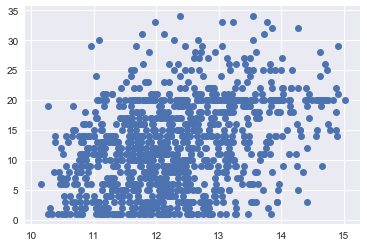

In [166]:
plt.plot(y_predict, y_train_remove_outlier, 'o')

In [170]:
order_of_features = np.argsort(grid.best_estimator_.feature_importances_)

for name, importance in zip(X_train_scaled_remove_outlier.columns[order_of_features], grid.best_estimator_.feature_importances_[order_of_features]):
    print(name, importance)

key_10 0.0
key_8 0.0
key_7 0.0
key_6 0.0
key_5 0.0
key_4 0.0
key_3 0.0
key_2 0.0
key_1 0.0
key_0 0.0
is_pop 0.0
time_signature 0.0
is_easy 0.0
key_9 0.0
is_rock 0.0036341736721
is_hiphop 0.0107937483068
mode 0.0130459753509
is_country 0.0142095955502
valence 0.0252276137782
energy 0.0299223599867
is_edm 0.036152644824
liveness 0.0420763175669
danceability 0.0489461907035
tempo 0.0579387656565
popularity 0.0655689155147
loudness 0.0744515631771
acousticness 0.110253245726
instrumentalness 0.111366523856
speechiness 0.156911248028
duration_ms 0.199501118301


In [173]:
pd.read_pickle('billboards_without_week_ranks.pkl')

Song  \
0                                       Jessie's Girl   
1                               The One That You Love   
2   Theme From "Greatest American Hero" (Believe I...   
3                                    I Don't Need You   
4                                              Elvira   
5                                           Slow Hand   
6                                    Bette Davis Eyes   
7                              Boy From New York City   
8                                              Hearts   
9                                     Queen Of Hearts   
10                                 You Make My Dreams   
11                                       Gemini Dream   
12                       (There's) No Gettin' Over Me   
13                                       Endless Love   
14                                               Time   
15                        Touch Me When We're Dancing   
16                             Lady (You Bring Me Up)   
17                                         The Stroke   
18                                         Sweet Baby   
19                                  It's Now Or Never   
20                                All Those Years Ago   
21                                             Urgent   
22                                 In The Air Tonight   
23                                   Don't Let Him Go   
24                                             Medley   
25                                        Modern Girl   
26            The Breakup Song (They Don't Write 'Em)   
27                                          Cool Love   
28              A Woman Needs Love (Just Like You Do)   
29                                   Who's Crying Now   
..                                                ...   
70                                    All Out Of Love   
71                                       It's For You   
72                                      Shotgun Rider   
73                                               JoJo   
74                                   You May Be Right   
75                                 The Very Last Time   
76                                            Sailing   
77                                     Into The Night   
78                                 Time For Me To Fly   
79                         The Seduction (Love Theme)   
80                                      The Blue Side   
81                         Happy Together (A Fantasy)   
82                                    Sweet Sensation   
83             Back Of My Hand (I've Got Your Number)   
84                   I'm Happy Just To Dance With You   
85                                Sisters Of The Moon   
86                                           Landlord   
87                                               Fame   
88                                     On The Rebound   
89                             One More Time For Love   
90                                      I Can Survive   
91                               Take A Little Rhythm   
92          Only The Lonely (Have A Reason To Be Sad)   
93  Don't Say Goodnight (It's Time For Love) (Part...   
94                       Don't Push It Don't Force It   
95                              Pilot Of The Airwaves   
96                                       Heart Hotels   
97                                Love And Loneliness   
98                                      Run Like Hell   
99                                Let Me Be The Clock   

                        Artist  
0             Rick Springfield  
1                   Air Supply  
2                Joey Scarbury  
3                 Kenny Rogers  
4           The Oak Ridge Boys  
5          The Pointer Sisters  
6                   Kim Carnes  
7       The Manhattan Transfer  
8                  Marty Balin  
9                 Juice Newton  
10       Daryl Hall John Oates  
11             The Moody Blues  
12               Ronnie Milsap  
13                  Diana Ross  
14    The Alan Pars

## Let's look at the residuals for this model fit

In [ ]:
fit.resid.plot(style='o', figsize=(12,8));

# I think I need to cross validate this base model?

In [ ]:
from sklearn.cross_validation import cross_val_score

In [ ]:
train_df_scaled.info()

In [ ]:
X_train_scaled.head(20)

In [ ]:
# 10-fold cross-validation with our fake data
reg = LinearRegression()
scores = cross_val_score(reg, X_train_scaled, y_train, cv=5, scoring='mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

# This is me attempting to do some regularization

In [ ]:
X_train_scaled
y_train

In [ ]:
kf = KFold(n=len(X), n_folds=5, shuffle=False)
alphas = [10**x for x in range(-12, 5)]
scores = np.zeros((len(alphas),1))


In [ ]:
for j in range(len(alphas)):
    kf_score = []
    for train, test in kf:
        X_train = X_train_scaled.iloc[train]
        y_train = y_train.iloc[train]
        X_test = X_train_scaled.iloc[test]
        y_test = y_tra.iloc[test]
        std_scaler = preprocessing.StandardScaler()
        X_train_norm = std_scaler.fit_transform(X_train)
        X_test_norm = std_scaler.transform(X_test)
    
        model =  Lasso(alpha = alphas[j])
        model.fit(X_train_norm, y_train)
        y_test_predict = model.predict(X_test_norm)
        score = mean_squared_error(y_test_predict, y_test)
        kf_score.append(score)
    scores[j] = np.mean(kf_score)
print ('mse for all alpha values \n')
print (pd.DataFrame(list(zip(alphas, scores)), columns=['alpha', 'mse']))

best_alpha = alphas[scores.argmin()]
print ('best alpha is:', best_alpha)

In [ ]:
#diagnostic plots dont work :(
diagnostic_plots.diagnostic_plots(train_df.drop('num_weeks', axis=1), train_df['num_weeks'], fit)

## doing it with sklearn

In [ ]:
linear_model = LinearRegression()
linear_model.fit(train_df.drop('num_weeks', 1), train_df['num_weeks'])
linear_model.score(train_df.drop('num_weeks', 1), train_df['num_weeks'])

In [ ]:
# Pick a coefficient d and make the features!
x_values = train_df.drop('num_weeks', 1)

def get_polynomial_features(degree, x_values):
    return PolynomialFeatures(degree=degree).fit_transform(x_values)

def get_polynomial_fit(degree, x_values, y_values):
    X = get_polynomial_features(degree, x_values)
    # we already have a column of "1"s for the intercept, 
    # so don't ask LinearRegression to make one as well
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y_values)
    print("Score of the model is {}".format(model.score(X, y_values)))
    
    return model

def plot_polynomial_model(degree, x_values, y_values):
    model = get_polynomial_fit(degree, x_values, y_values)
    # plot points
    plt.plot(x_values, y_values, 'ro')
    
    # make the curve
    x_curve = np.arange(0,17,0.1).reshape(-1,1)
    X_curve = get_polynomial_features(degree, x_curve)
    y_curve = model.predict(X_curve)
    plt.plot(x_curve, y_curve)
    plt.ylim((0,160))
    


# example
get_polynomial_features(2, x_values)

In [ ]:
def plot_predict_and_points(x_values, y_values, model):
    y_predict = model.predict(x_values)

    plt.plot(x_values[:,0], y_values, 'ro')
    plt.plot(x_values[:,0], y_predict, 'b--')
    plt.xlabel('x')
    plt.ylabel('y')

In [ ]:
plot_predict_and_points(train_df.drop('num_weeks', 1), train_df['num_weeks'], linear_model)

## c r o s s v a l i d a t i o n 

In [ ]:
from sklearn.cross_validation import cross_val_score

In [ ]:
# 10-fold cross-validation with our fake data
reg = LinearRegression()
scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)
#root mean squared errors telling us the root(mean((actual - predicted)**2)) therefore want to minimize!

In [ ]:
est=LinearRegression()

kf=KFold(n=len(X),n_folds=5,shuffle=True)

all_scores=[]

# Instead of using cross_val_score, let's use sklearn.cross_validation.KFold; this will allow
# us to 'manipulate' our training set, 

# get indices of corresponding train & test
for train,test in kf:
    x_train=X.iloc[train]
    y_train=y.iloc[train]
    x_test=X.iloc[test]
    y_test=y.iloc[test]
    pvals=[]
    sig_cols=[]
    
    for feature in x_train.columns:
        pval=f_select.f_regression(x_train[[feature]],y_train)
        if pval[1][0]<.02: 
            sig_cols.append(feature)
            pvals.append(pval[1][0])
            
    est.fit(x_train[sig_cols],y_train)
    r_2=est.score(x_test[sig_cols],y_test)
    all_scores.append(r_2)
        
#np.mean(all_scores)
    

In [ ]:
np.log(train_df.popularity + 1).hist()

In [ ]:
sns.pairplot(train_df, vars = ['num_weeks', 'popularity', 'danceability', 'is_pop', 'is_edm', 'is_hiphop'])

## Base Linear Regression Model

In [230]:
useful_dataset_with_keys = pd.read_pickle('Modeling/dataset_used_for_modeling.pkl')

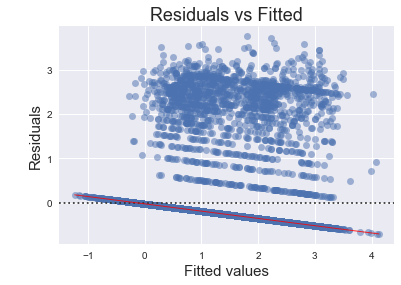

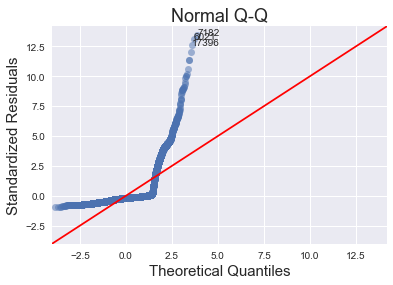

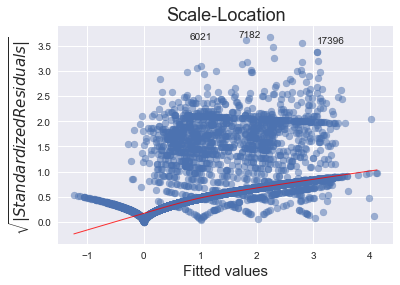

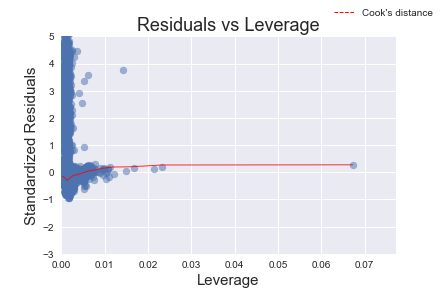

In [232]:
#results.resid.plot(style='o', figsize=(12,8));
diagnostic_plots.diagnostic_plots(useful_dataset_with_keys.drop('num_weeks', axis=1), 
                                  useful_dataset_with_keys['num_weeks'], fit)

In [ ]:
# Diagnostic Plots
import scipy.stats as stats
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x.reshape(-1,1),y)
    pred = rgr.predict(x.reshape(-1,1))

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    
# # Generate some data
# s = 30
# x = np.random.uniform(low=-5, high=5, size=s)

# ep = 2*np.random.randn(s)
# beta = 2
# y = beta*x + ep

# diagnostic_plot(x,y)

In [229]:
useful_dataset_with_keys['log_num_weeks'] = np.log(useful_dataset_with_keys.num_weeks + 1).hist()
useful_dataset_with_keys.drop('num_weeks',1, inplace = True)

diagnostic_plot(X_train, y_train)

NameError: name 'useful_dataset_with_keys' is not defined

In [ ]:
type(useful_dataset_with_keys.log_num_weeks)

In [ ]:
useful_dataset_with_keys.columns

In [ ]:
diagnostic_plots.diagnostic_plots(useful_dataset_with_keys.drop('log_num_weeks', axis=1), 
                                  useful_dataset_with_keys['log_num_weeks'], results)

In [ ]:
def plot_predict_and_points(x_values, y_values, model):
    y_predict = model.predict(x_values)

    plt.plot(x_values[:,0], y_values, 'ro')
    plt.plot(x_values[:,0], y_predict, 'b--')
    plt.xlabel('x')
    plt.ylabel('y')
    
#plot_predict_and_points(x_values, y_values, linear_model)
#plt.title('This IS the line that best fits the data');

In [ ]:
# Create your feature matrix (X) and target vector (y)

equation = 'num_weeks ~ duration_ms + key + loudness + tempo + time_signature  + '
y, X = patsy.dmatrices(equation, data=joined)

model = sm.OLS(y, X)
model_fit = model.fit()
model_fit.summary()


In [ ]:
#might have to drop some columns based on how the

In [ ]:
linear_model = LinearRegression()
linear_model.fit(df.key.reshape(-1,1), useful_dataset_with_keys.num_weeks)
linear_model.score(df.key.reshape(-1,1), useful_dataset_with_keys.num_weeks)

plot_predict_and_points(df.key.reshape(-1,1), df.num_weeks, linear_model)
plt.title('This is NOT the line that best fits the data--High Bias');
plt.xlabel('Song Key');
plt.ylabel('Number of Weeks on Billboard');

#plt.savefig('first_model.png', dpi=1000) 

In [ ]:
import matplotlib.pyplot as plt

#pd.Series(fit.resid).plot(style='o', figsize=(12,8));

y_predict = model_fit.predict(X)
y_resid = y.reshape(-1,) - y_predict

#y_resid.shape
plt.plot(y.reshape(-1,), y_resid.reshape(-1,),'o');
plt.xlabel('y_true')
plt.ylabel('residual')

#plt.savefig('first_model_residual.png', dpi=1000) 

In [ ]:
linear_model = LinearRegression()
linear_model.fit(df.key.reshape(-1,1), df.num_weeks.reshape(-1,1))
linear_model.score(df.key.reshape(-1,1), df.num_weeks.reshape(-1,1))

## Robert's Diagnostic Plots

In [ ]:
# model values
model_fitted_y = model_fit.fittedvalues
#print(df.columns[-1])
#print(len(model_fitted_y))
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, np.asarray(df.columns[-1]), data=df,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [ ]:
(df.num_weeks)